# **2 - N-grams, TF-IDF and Use of Neural Networks**

>**Nanodegree 1: Natural Language Processing `NLP`**

## **2.1 N-gram**
## **2.2 TF-IDF**
## **2.3 Neural networks**

## **Sentiment Analyzer**

- From now on, we will add **artificial neural networks** to our example to try to improve the results even further.
- To do this, we will use a **neural network** creation framework called [**TensorFlow**](https://www.tensorflow.org/?hl=pt-br) (created by Google).
- For its use, another framework will be used, called [**Keras**](https://keras.io/), which facilitates the use of **TensorFlow**.


My repository: [artificial-intelligence-data-sci](https://github.com/AngelOttoni/artificial-intelligence-data-sci.git)

### **Movie Review Dataset**

- The IMDB dataset contains 50 thousand movie reviews and is used for binary sentiment classification (positive and negative).


  1. Access the [IMDB](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) dataset, which contains 50,000 movie reviews.  
  2. Use the `Pandas` `Python` package, to analyze this dataset.
    - To do so, open [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true).  



- In this hands-on, we will cover techniques for performing **text classification**.
- To do this, we will use a dataset of films.

In [2]:
#Import Pandas using:
import pandas as pd

In [3]:
# Read the CSV file from the Google Drive link
url = 'https://drive.google.com/u/0/uc?id=1ZlZsxrMHhZZb9ZTYABOiWw7bCPofY6cz&export=download'
df = pd.read_csv(url, header=0)

In [4]:
# Display the first few rows of the DataFrame
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


- **Checks whether there are null values in the dataset:**

In [5]:
# Count the number of missing (null) values in each column of the DataFrame 'df'
df.isnull().sum()

review       0
sentiment    0
dtype: int64

- **Next, let's check the number of positive and negative examples:**

In [6]:
# Count the occurrences of unique values in the 'sentiment' column of the DataFrame 'df'
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

- **As we can see above, the classes are balanced, with 25,000 examples for each class.**
- **Let's plot this relationship:**

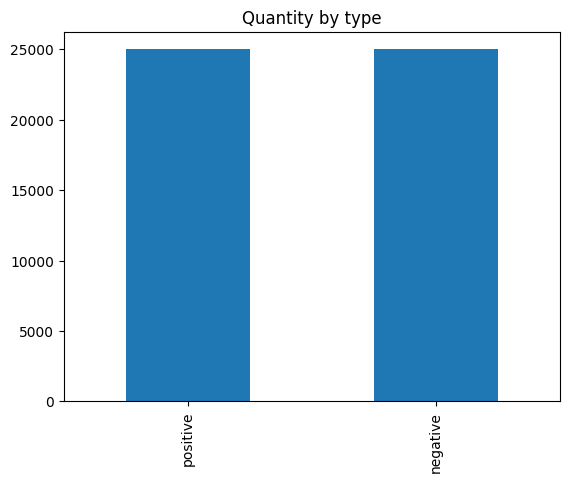

In [7]:
# Generate a bar plot to visualize the quantity of each unique value in the 'sentiment' column
# Set the plot title to "Quantity by type" and rotate the x-axis labels by 90 degrees
df['sentiment'].value_counts().plot.bar(title="Quantity by type",rot=90);

## **Text preprocessing with [`NLTK`](https://www.nltk.org/)**

>*Natural Language Toolkit*

- The pre-processing step is very important to create adequate and effective **`PLN`** models.
- Therefore, our goal now is to start this pre-processing.
- Now that you know your dataset a little, import the [`Python NLTK library`](https://www.nltk.org/) and pre-process the text.

In [8]:
# Install the Natural Language Toolkit (NLTK) library using pip
!pip install nltk

In [9]:
# Import the Natural Language Toolkit (nltk) library for natural language processing tasks
import nltk

# Import the 'string' module, which provides various string manipulation functions
import string

In [10]:
# Download NLTK data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


- **We will remove punctuations, stopwords and perform word counting:**

In [11]:
# Extract the text of the first 'review' in the DataFrame 'df'
example = df['review'].values[0]
print(example)
print(len(example.split()))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

- **We will remove punctuations, stopwords and perform word counting:**

In [12]:
# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

In [13]:
# Define a function for initial text preparation
def initial_preparation(text):
# Tokenize the text into words using NLTK's word_tokenize
  words = [
      i for i in word_tokenize(text, language='english')
      if i not in punctuations]
  words = [
      i for i in words if i not in stop_words
  ]
  return words

In [14]:
# Apply initial text preparation to the 'example' text
prepared_example = initial_preparation(example)
print(prepared_example)
print(len(prepared_example))

['One', 'reviewers', 'mentioned', 'watching', '1', 'Oz', 'episode', "'ll", 'hooked', 'They', 'right', 'exactly', 'happened', 'me.', 'br', 'br', 'The', 'first', 'thing', 'struck', 'Oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'GO', 'Trust', 'show', 'faint', 'hearted', 'timid', 'This', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'Its', 'hardcore', 'classic', 'use', 'word.', 'br', 'br', 'It', 'called', 'OZ', 'nickname', 'given', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', 'It', 'focuses', 'mainly', 'Emerald', 'City', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'Em', 'City', 'home', 'many', '..', 'Aryans', 'Muslims', 'gangstas', 'Latinos', 'Christians', 'Italians', 'Irish', '....', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away.', 'br', 'br', 'I', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 

- Now, we went from **307** to **196** tokens.
- Note that there are some very small words (with just one letter), as well as some words that we can ignore.
- So let's create an additional function to remove them.

- Furthermore, we will use a technique called [stemming](https://www.geeksforgeeks.org/introduction-to-stemming/).
  - **Stemming** is the technique of removing suffixes and prefixes from a word, called **stemming**.
  - For example, the stem of the word cooking is cook.
  - A good algorithm knows that "ing" is a suffix and can be removed.
  - **Stemming** is widely used in search engines for indexing words.
  - Let's use **stemming** to further simplify our problem, removing word variations.

  [`SnowballStemmer`](https://www.nltk.org/_modules/nltk/stem/snowball.html)


**Let's remove them by adding the code below to our function:**

In [15]:
# Import the SnowballStemmer from NLTK's stem module
from nltk.stem import SnowballStemmer

# Create an instance of the SnowballStemmer for the English language
stemmer = SnowballStemmer('english')

In [16]:
# Define the minimum length for words to be retained
MIN_LEN = 1

# Define a list of words to be ignored during text processing
IGNORE = ['..', '...', '....', 'br','.so','\'ll']

In [17]:
# Define a function for further text preparation
def prep(text):
  words = [
      i for i in word_tokenize(text, language='english') if i not in punctuations
  ]
  words = [
      i for i in words if i not in stop_words
  ]
  words = [
      i for i in words if len(i) > MIN_LEN
  ]
  words = [
      i for i in words if i not in IGNORE
  ]
  words = [
      stemmer.stem(i) for i in words
  ]
  return words

In [18]:
# Apply further text preparation to the 'example' text
prepared_example = prep(example)
print(prepared_example)
print(len(prepared_example))

['one', 'review', 'mention', 'watch', 'oz', 'episod', 'hook', 'they', 'right', 'exact', 'happen', 'me.', 'the', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'this', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'it', 'hardcor', 'classic', 'use', 'word.', 'it', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'it', 'focus', 'main', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'mani', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away.', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'would', "n't", 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'charm', 'forget

- **Thus, we reduced from 196 to 176 tokens.**
- **Now that we've tested the function, let's run this preparation function on the review column of our dataset and then put the text back together so that it becomes a sentence again, not a list of words.**
- **As the function may take time, we will use the `%%time` directive to show us the processing time.**

In [19]:
# Measure the execution time of the following code cell
%%time
# Apply the 'prep' function to the 'review' column of the DataFrame and join the results
df['review2'] = df['review'].apply(prep)
df['review2'] = df['review2'].apply(' '.join)

CPU times: user 3min 34s, sys: 1.06 s, total: 3min 35s
Wall time: 4min 1s


In [20]:
# Display the first few rows of the DataFrame
df.head()

,review,sentiment,review2
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook they r...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product the film techniqu unassum...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic 's famili littl boy jake think 's zombi ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visual ...


- Ready! We can now start using a **machine learning algorithm** to try to classify our examples.

- Let's first separate the training and test data, with 20% for the test data.

- To do this, we will use the function [**`train_test_split`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [21]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

In [22]:
# Split the data into training and testing sets
# - 'df['review2']' represents the feature (X) data, and 'df['sentiment']' represents the target (y) data
# - 'test_size=0.2' specifies that 20% of the data will be used for testing, while 80% will be for training
# - 'random_state=0' sets a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(df['review2'], df['sentiment'], test_size=0.2, random_state=0)

# Print the shapes (dimensions) of the training and testing sets
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (40000,)
y_train shape: (40000,)
X_test shape: (10000,)
y_test shape: (10000,)


# **Applying TF-IDF**



In [23]:
# Import the TfidfVectorizer class from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer

- **Let's change our example to use the processing of a simple neural network model.**
- **Before that, it is necessary to limit the number of words to 10,000, so that our model does not become too complex, which would cause very high memory usage.**

In [24]:
MAX_FEATURES = 10000

In [25]:
# Measure the execution time for the following TF-IDF vectorization process
%%time

# Create a TfidfVectorizer object 'tfidf' for feature extraction
# - 'strip_accents='unicode'' specifies to strip accents using Unicode encoding
# - 'ngram_range=(1, 3)' specifies that unigrams (1-word), bigrams (2-words), and trigrams (3-words) will be considered as features
# - 'max_features=MAX_FEATURES' limits the maximum number of features (vocabulary size)
tfidf = TfidfVectorizer(strip_accents='unicode', ngram_range=(1, 3), max_features=MAX_FEATURES)

# Fit and transform the training data 'X_train' into a TF-IDF vector representation
tfidf_X_train = tfidf.fit_transform(X_train)

# Transform the testing data 'X_test' into a TF-IDF vector representation using the same 'tfidf' object
tfidf_X_test = tfidf.transform(X_test)

CPU times: user 1min 8s, sys: 2.16 s, total: 1min 11s
Wall time: 1min 12s


In [26]:
# Print the shape (dimensions) of the TF-IDF matrix for the training data
print('tfidf_X_train shape:', tfidf_X_train.shape)

# Print the shape (dimensions) of the TF-IDF matrix for the testing data
print('tfidf_X_test shape:', tfidf_X_test.shape)

tfidf_X_train shape: (40000, 10000)
tfidf_X_test shape: (10000, 10000)


- **Now the feature limit is 10,000, this means that the input layer of the neural network will have dimension 10,000.**

- As the sentiment values are **"positive"** and **"negative"**, we need to encode them in a format that can be used in **machine learning** models.

- Let's then create `one-hot-encoding` for these values, with the function [`LabelBinarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).

In [27]:
# Import the LabelBinarizer class from the sklearn.preprocessing module
from sklearn.preprocessing import LabelBinarizer

In [28]:
# Create an instance of the LabelBinarizer class
lb = LabelBinarizer()

# Transform the 'y_train' labels into one-hot encoded format
ohe_y_train = lb.fit_transform(y_train)

# Transform the 'y_test' labels into one-hot encoded format
ohe_y_test = lb.fit_transform(y_test)

In [29]:
# Print the shape (dimensions) of the one-hot encoded training labels
print('ohe_y_train shape:',ohe_y_train.shape)

# Print the shape (dimensions) of the one-hot encoded test labels
print('ohe_y_test shape:',ohe_y_test.shape)

ohe_y_train shape: (40000, 1)
ohe_y_test shape: (10000, 1)


In [30]:
# Install TensorFlow using pip
!pip install tensorflow

In [31]:
# Install TensorBoard using pip
!pip install tensorboard

In [32]:
# Load the TensorBoard extension to enable TensorBoard functionality
%load_ext tensorboard

# Import TensorFlow and Keras for deep learning tasks
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential  # Import Sequential model
from keras.layers import Dense, Dropout, Activation  # Import layers from TensorFlow's Keras
from keras.optimizers import Adam  # Import the optimizer
#from keras.utils import np_utils
#For keras > 2.0, please use from keras.utils import to_categorical instead.
from keras.utils import to_categorical
from keras.callbacks import TensorBoard  # Import TensorBoard callback
from keras.models import load_model  # Import the model loading function

In [33]:
# Define the number of training epochs
NB_EPOCH = 5

# Define the batch size for training
BATCH_SIZE = 128

# Define the verbosity level for training output (1 for detailed output)
VERBOSE = '1'

# Initialize the optimizer (Adam optimizer)
OPTIMIZER = Adam()

- **With this, we are defining:**

  **number of epochs** - number of times the training data will be submitted to the network;

  **batch size** - number of examples that will be submitted to the network at each training step;

  **verbose** - indicates that we want to monitor the execution results each epoch;

  **optimizer** - we chose the `Adam()` optimizer.

- The above hyperparameters can be varied during model development to try to obtain better results.

- It is recommended that, at each training session, the hyperparameter values used and the results are saved so that a history of attempts can be maintained.

- Next, let's define the **architecture of the neural network**:

In [34]:
# Create a Sequential model (a linear stack of layers)
model = Sequential()

# Add a dense layer with 16 units and input shape matching TF-IDF matrix columns
model.add(Dense(16, input_shape=(tfidf_X_train.shape[1],)))

# Add the ReLU activation function to the dense layer
model.add(Activation('relu'))

# Add a dropout layer to prevent overfitting (50% dropout rate)
model.add(Dropout(0.5))

# Add another dense layer with 1 unit for binary classification
model.add(Dense(1))

# Add the sigmoid activation function for binary classification
model.add(Activation('sigmoid'))

# Display a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 160033 (625.13 KB)
Trainable params: 160033 (625.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- **Note that we created a neural network with 160 thousand parameters.**

- **Next, we'll compile and train the model:**

In [35]:
# Compile the neural network model
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

# Define a TensorBoard callback for visualization
tbCallBack = TensorBoard(log_dir='logs_pln_nn', histogram_freq=0, write_graph=True)

# Train the neural network model
model_v1 = model.fit(
    tfidf_X_train.toarray(),  # Training input data (TF-IDF features)
    ohe_y_train,             # Training labels (one-hot encoded)
    batch_size=BATCH_SIZE,   # Batch size for training
    epochs=NB_EPOCH,         # Number of training epochs
    verbose=VERBOSE,         # Verbosity level for training output
    validation_split=0.2,    # Percentage of training data for validation
    callbacks=[tbCallBack]   # List of callbacks, including TensorBoard
)

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [ ]:
# Launch TensorBoard to visualize training logs
%tensorboard --logdir logs_pln_nn

In [37]:
!ls logs_pln_nn

train  validation


- **Then we print the test data score:**

In [39]:
# Evaluate the model's performance on the test data
# tfidf_X_test.toarray() converts the TF-IDF features to a dense array
# ohe_y_test contains the one-hot encoded target labels for the test data
# verbose=VERBOSE controls the verbosity of the evaluation process
loss, accuracy = model.evaluate(tfidf_X_test.toarray(), ohe_y_test, verbose=VERBOSE)

# Print the test accuracy, formatted to 4 decimal places
print("Test Accuracy:  {:.4f}".format(accuracy))

Test Accuracy:  0.8989


- **Note that we achieved a slightly better result than before: 89.8%.**

- **To finish, let's plot the network's accuracy and loss graphs:**

- **Observe the increase in model accuracy during the evolution of training epochs.**


- **It is worth noting that the value of greatest interest is the training result, which remained stable even after several training periods.**

In [40]:
# Import the necessary library for creating plots
import matplotlib.pyplot as plt

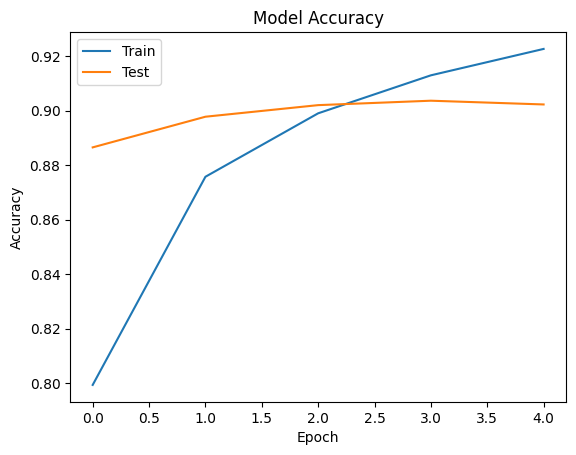

In [41]:
# Plotting the training and validation accuracy over epochs
# model_v1.history contains training history information, including accuracy and validation accuracy
# 'accuracy' and 'val_accuracy' are keys for accessing the training and validation accuracy
plt.plot(model_v1.history['accuracy'])       # Training accuracy
plt.plot(model_v1.history['val_accuracy'])   # Validation accuracy
plt.title('Model Accuracy')                  # Set the title of the plot
plt.ylabel('Accuracy')                       # Label for the y-axis
plt.xlabel('Epoch')                         # Label for the x-axis
plt.legend(['Train', 'Test'], loc='upper left')  # Add a legend to the plot (Train and Test)
plt.show()                                  # Display the plot

**FIGURE 2** - Neural network accuracy graph

- **The next graph shows the value of the loss function versus epoch.**
- **Again, we can see that the value of tests does not reduce significantly with the evolution of epochs.**
- **In other words, training with more seasons will not help in this case.**

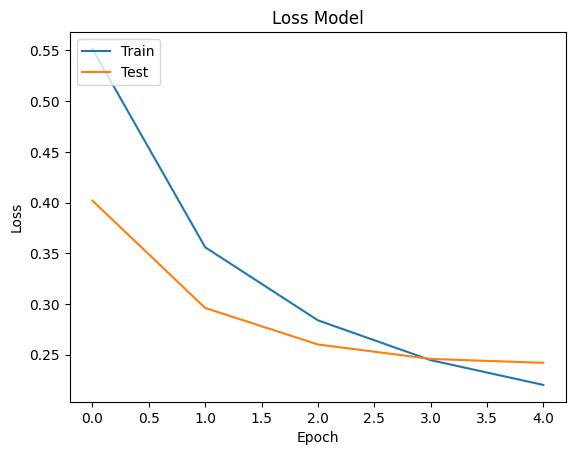

In [42]:
# Plotting the training and validation loss over epochs
# model_v1.history contains training history information, including loss and validation loss
# 'loss' and 'val_loss' are keys for accessing the training and validation loss
plt.plot(model_v1.history['loss'])       # Training loss
plt.plot(model_v1.history['val_loss'])   # Validation loss
plt.title('Loss Model')                  # Set the title of the plot
plt.ylabel('Loss')                       # Label for the y-axis
plt.xlabel('Epoch')                      # Label for the x-axis
plt.legend(['Train', 'Test'], loc='upper left')  # Add a legend to the plot (Train and Test)
plt.show()                                # Display the plot

**FIGURE 3** - Neural network loss graph

### **Conclusion**
- **Thus, we created a network with a simple architecture and we have already achieved a model that is slightly better than traditional machine learning models.**

In [64]:
print("The end!")

The end!
